In [1]:
import pandas as pd
import numpy as np
import string
import pickle
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
import datetime
import json

## 뉴스 본문-서머리 파일 읽어오기

In [66]:
df= pd.read_pickle('hi.pkl')

In [67]:
df.shape

(100000, 2)

In [68]:
lines = df.copy()
print(lines.head(3))
print(lines.tail(3))

                                          body_nouns  \
0  중증 폐질환 유발 가능성 미국서 건 의심환자 발생 사망국내 상황 악화 판매 금지 고...   
1  제주 최대 밀리미터 물폭탄 제호 태풍 타파 한반도 접근 부산 앞바다 전망 예상 기상...   
2  비바람 행인 우산 토요일 제호 태풍 타파 영향 전국 비 예상 강수량 제주 ∼밀리미터...   

                                       summary_nouns  
0  정부 액상형 전자담배 사용 자제 권고 복지부 미국 사례 참조 액상형 전자담배 사용 ...  
1  제호 태풍 타파 한반도 접근 부산 앞바다 전망 예상 중심 기압 hPa, 중심 부근 ...  
2  토요일 제호 태풍 타파 영향 전국 비 기상청 제주도 동해안 남해안 지리산 부근 중심...  
                                              body_nouns  \
99997  세인트루이스 카디널스 구단 코로나 확진자 추가 발생 총 미국 매체 세인트루이스 포스...   
99998  롯데 자이언츠 첫 주말 연승 장식 롯데 사직구장 타이거즈전 이닝 무실점 호투한 노경...   
99999  웨 루니 더비 카운티 과거 맨체스터 유나이티드 시절 알렉스 퍼거슨 감독 전술 비판 ...   

                                           summary_nouns  
99997  세인트루이스 카디널스 구단 코로나 확진자 추가 발생 총 세인트루이스 코로나 확진 판...  
99998  롯데 자이언츠 첫 주말 연승 장식 롯데 사직구장 타이거즈전 이닝 무실점 호투한 노경...  
99999  웨 루니 더비 카운티 과거 맨체스터 유나이티드 시절 알렉스 퍼거슨 감독 전술 비판 ...  


In [69]:
lines.columns = ['body','summ']

In [70]:
#대문자-> 소문자 변경
lines['body']=lines['body'].apply(lambda x: x.lower())
lines['summ']=lines['summ'].apply(lambda x: x.lower())

In [71]:
#특수문자 제거
exclude = set(string.punctuation)
lines.body=lines.body.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines.summ=lines.summ.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [72]:
print(lines.head(3))
print(lines.tail(3))

                                                body  \
0  중증 폐질환 유발 가능성 미국서 건 의심환자 발생 사망국내 상황 악화 판매 금지 고...   
1  제주 최대 밀리미터 물폭탄 제호 태풍 타파 한반도 접근 부산 앞바다 전망 예상 기상...   
2  비바람 행인 우산 토요일 제호 태풍 타파 영향 전국 비 예상 강수량 제주 ∼밀리미터...   

                                                summ  
0  정부 액상형 전자담배 사용 자제 권고 복지부 미국 사례 참조 액상형 전자담배 사용 ...  
1  제호 태풍 타파 한반도 접근 부산 앞바다 전망 예상 중심 기압 hpa 중심 부근 최...  
2  토요일 제호 태풍 타파 영향 전국 비 기상청 제주도 동해안 남해안 지리산 부근 중심...  
                                                    body  \
99997  세인트루이스 카디널스 구단 코로나 확진자 추가 발생 총 미국 매체 세인트루이스 포스...   
99998  롯데 자이언츠 첫 주말 연승 장식 롯데 사직구장 타이거즈전 이닝 무실점 호투한 노경...   
99999  웨 루니 더비 카운티 과거 맨체스터 유나이티드 시절 알렉스 퍼거슨 감독 전술 비판 ...   

                                                    summ  
99997  세인트루이스 카디널스 구단 코로나 확진자 추가 발생 총 세인트루이스 코로나 확진 판...  
99998  롯데 자이언츠 첫 주말 연승 장식 롯데 사직구장 타이거즈전 이닝 무실점 호투한 노경...  
99999  웨 루니 더비 카운티 과거 맨체스터 유나이티드 시절 알렉스 퍼거슨 감독 전술 비판 ...  


In [73]:
#summary 문자 앞뒤에 'start of sentence', 'end of sentence' 집어넣기
lines.summ = lines.summ.apply(lambda x : 'sofs '+ x + ' eofs')

In [10]:
print(lines.head(3))
print(lines.tail(3))

                                                body  \
0  중증 폐질환 유발 가능성 미국서 건 의심환자 발생 사망국내 상황 악화 판매 금지 고...   
1  제주 최대 밀리미터 물폭탄 제호 태풍 타파 한반도 접근 부산 앞바다 전망 예상 기상...   
2  비바람 행인 우산 토요일 제호 태풍 타파 영향 전국 비 예상 강수량 제주 ∼밀리미터...   

                                                summ  
0  sofs 정부 액상형 전자담배 사용 자제 권고 복지부 미국 사례 참조 액상형 전자담...  
1  sofs 제호 태풍 타파 한반도 접근 부산 앞바다 전망 예상 중심 기압 hPa, 중...  
2  sofs 토요일 제호 태풍 타파 영향 전국 비 기상청 제주도 동해안 남해안 지리산 ...  
                                                    body  \
99997  세인트루이스 카디널스 구단 코로나 확진자 추가 발생 총 미국 매체 세인트루이스 포스...   
99998  롯데 자이언츠 첫 주말 연승 장식 롯데 사직구장 타이거즈전 이닝 무실점 호투한 노경...   
99999  웨 루니 더비 카운티 과거 맨체스터 유나이티드 시절 알렉스 퍼거슨 감독 전술 비판 ...   

                                                    summ  
99997  sofs 세인트루이스 카디널스 구단 코로나 확진자 추가 발생 총 세인트루이스 코로나...  
99998  sofs 롯데 자이언츠 첫 주말 연승 장식 롯데 사직구장 타이거즈전 이닝 무실점 호...  
99999  sofs 웨 루니 더비 카운티 과거 맨체스터 유나이티드 시절 알렉스 퍼거슨 감독 전...  


In [11]:
lines.shape

(100000, 2)

In [30]:
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

## word count 빈도수 80%까지만 남겨두기

In [31]:
#tokenize
body_tokenizer = create_tokenizer(lines['body'])

#(word, count)형태 추출
body_dict=json.loads(json.dumps(body_tokenizer.word_counts))
df =pd.DataFrame([body_dict.keys(), body_dict.values()]).T
df.columns = ['word','count']

#count순으로 
df = df.sort_values(by='count',ascending = False)

#누적 percentage 구하기
df['cum_count']=df['count'].cumsum()
df['cum_perc'] = df['cum_count']/df['cum_count'].max()

#80%만 남겨두기
final_body_words = df[df['cum_perc']<0.8]['word'].values

In [32]:
#tokenize
summ_tokenizer = create_tokenizer(lines['summ'])

#(word, count)형태 추출
summ_dict = json.loads(json.dumps(summ_tokenizer.word_counts))
df =pd.DataFrame([summ_dict.keys(), summ_dict.values()]).T
df.columns = ['word','count']

#count순으로 
df = df.sort_values(by='count',ascending = False)

#누적 percentage 구하기
df['cum_count']=df['count'].cumsum()
df['cum_perc'] = df['cum_count']/df['cum_count'].max()

#80%만 남겨두기
final_summ_words = df[df['cum_perc']<0.8]['word'].values

In [35]:
print(len(final_body_words),len(final_summ_words))

9170 4877


## Replace the rest with 'unk'

In [15]:
def filterit_body(x):
    t = []
    x = x.split()
    for i in range(len(x)):
        if x[i] in final_body_words:
            t.append(x[i])
    else:
        t.append('unk') 
    x3 = ''
    for i in range(len(t)):
        x3 = x3+t[i]+' '
    return x3

In [18]:
filterit_body('우한 중국 대통령')

'우한 중국 대통령 unk '

In [19]:
def filterit_summ(x):
    t = []
    x = x.split()
    for i in range(len(x)):
        if x[i] in final_summ_words:
            t.append(x[i])
    else:
        t.append('unk')
    x3 = ''
    for i in range(len(t)):
        x3 = x3+t[i]+' '
    return x3

In [20]:
from tqdm import tqdm

for i in tqdm(range(len(lines['body']))):
    lines['body'][i] = filterit_body(lines['body'][i])    

100%|██████████| 100000/100000 [1:51:18<00:00, 14.97it/s] 


In [21]:
for i in tqdm(range(len(lines['summ']))):
    lines['summ'][i] = filterit_summ(lines['summ'][i])    

100%|██████████| 100000/100000 [09:44<00:00, 171.10it/s]


In [41]:
#별도 파일에 저장
lines.to_pickle('lines.pkl')

In [48]:
lines=pd.read_pickle('lines.pkl')

## Get dictionary including 'unk'

In [49]:
all_body_words=set()
for body in lines.body:
    for word in body.split():
        if word not in all_body_words:
            all_body_words.add(word)
    
all_summ_words=set()
for summ in lines.summ:
    for word in summ.split():
        if word not in all_summ_words:
            all_summ_words.add(word)

In [50]:
input_words = sorted(list(all_body_words))
target_words = sorted(list(all_summ_words))
num_encoder_tokens = len(all_body_words)
num_decoder_tokens = len(all_summ_words)

In [51]:
#body부분 전체 빈도수
len(all_body_words)

9171

In [52]:
#summary부분 전체 빈도수
len(target_words)

4878

In [53]:
#용어 사전 구축
input_token_index = dict(
    [(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict(
    [(word, i+1) for i, word in enumerate(target_words)])

In [54]:
num_decoder_tokens

4878

In [65]:
print(input_token_index['unk'])
print(target_token_index['sofs'])
print(target_token_index['eofs'])
print(list(input_token_index.keys())[89])
print(list(target_token_index.keys())[20])
print(list(target_token_index.keys())[4])

90
21
5
unk
sofs
eofs


## 일정한 row 길이 유지 => limit 넘는건 cut, 남는건 padding 필요

In [66]:
length_list=[]
for l in lines.summ:
    length_list.append(len(l.split(' ')))
summ_max_length = np.max(length_list)

In [67]:
length_list=[]
for l in lines.body:
    length_list.append(len(l.split(' ')))
body_max_length = np.max(length_list)

In [68]:
print(body_max_length)
print(summ_max_length)

7028
65


{'whiskers': [<matplotlib.lines.Line2D at 0x7f23bcbecd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f23bcbd9400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f23bcbec9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f23bcbd9ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f23bcbd9e20>],
 'means': []}

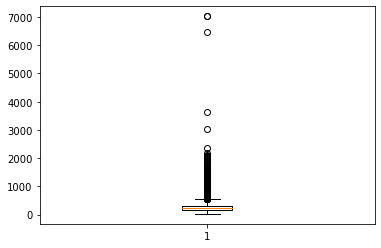

In [69]:
import matplotlib.pyplot as plt
plt.boxplot(length_list)

적절한 본문문길이=300, 요약문길이=50으로 정함

In [70]:
body_max_length = 300
summ_max_length = 50

## Build data for inputs & outputs

**encoder_input_data**
- 인코더 RNN에 삽입될 데이터
- (100000, 300)
- 추후 embedded될 예정
  
**decoder_input_data**
- 디코더 RNN에 삽입될 데이터
- (100000, 50)
- 추후 embedded될 예정
  
**decoder_target_data**
- 디코더 output 실제값
- 각 RNN cell에 대해 FC layer가 붙기 때문에 shape은 3D tensor인 (100000, 50, 4879)

In [74]:
encoder_input_data = np.zeros(
    (len(lines['body']), body_max_length),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(lines['summ']), summ_max_length),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(lines['summ']), summ_max_length, num_decoder_tokens+1),
    dtype='float32')

In [75]:
decoder_target_data.shape

(100000, 50, 4879)

In [ ]:
lines['summ']

In [74]:
target_token_index['eofs']

5

In [75]:
for i, (input_text, target_text) in enumerate(zip(lines['body'], lines['summ'])):
    
    #encoder_input
    for t, word in enumerate(input_text.split()):
        if t==300:
            break
        encoder_input_data[i, t] = input_token_index[word] #dictionary에서 해당하는 index 가져오기
    
    #decoder_input & decoder_output
    for t, word in enumerate(target_text.split()):
        if t==50:
            break
        if t==49:
            word='eofs' #본문길이 50이 넘어가면 끊고 end of sentence 붙인다.
        decoder_input_data[i, t] = target_token_index[word] #dictionary에서 해당하는 index 가져오기
        
        if t>0:
            decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            if t== len(target_text.split())-1 or t==49:
                decoder_target_data[i, t:, target_token_index['eofs']] = 1 #뒷부분 padded 부분은 end of sentence로


In [ ]:
print(decoder_input_data.shape,encoder_input_data.shape,decoder_target_data.shape)

In [77]:
decoder_input_data[10000]

array([  21., 1418.,  544., 4579., 3549.,   24., 3033.,  245., 4807.,
        544., 3115., 1421., 3834.,  172., 4591.,  245., 4807.,  245.,
       1081., 1790.,  658., 1284.,  544.,   24., 1421.,    5.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.], dtype=float32)

In [82]:
decoder_target_data[10000][48][:10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [79]:
#decoder input에도 뒤에 padded 부분은 end of sentence로
for i in range(decoder_input_data.shape[0]):
    for j in range(decoder_input_data.shape[1]):
        if(decoder_input_data[i][j]==0):
            decoder_input_data[i][j] = target_token_index['eofs'] 

In [87]:
decoder_input_data[10000]

array([  21., 1418.,  544., 4579., 3549.,   24., 3033.,  245., 4807.,
        544., 3115., 1421., 3834.,  172., 4591.,  245., 4807.,  245.,
       1081., 1790.,  658., 1284.,  544.,   24., 1421.,    5.,    5.,
          5.,    5.,    5.,    5.,    5.,    5.,    5.,    5.,    5.,
          5.,    5.,    5.,    5.,    5.,    5.,    5.,    5.,    5.,
          5.,    5.,    5.,    5.,    5.], dtype=float32)

## Train / Validation Split

In [76]:
split_ratio = 0.8
cut = int(len(decoder_input_data)*split_ratio)
cut

80000

In [77]:
#8/2
enc_train = encoder_input_data[:cut]
enc_val = encoder_input_data[cut:]

dec_in_train = decoder_input_data[:cut]
dec_in_val = decoder_input_data[cut:]

dec_out_train = decoder_target_data[:cut]
dec_out_val = decoder_target_data[cut:]

In [78]:
print(enc_train.shape, enc_val.shape)
print(dec_in_train.shape, dec_in_val.shape)
print(dec_out_train.shape, dec_out_val.shape)

(80000, 300) (20000, 300)
(80000, 50) (20000, 50)
(80000, 50, 4879) (20000, 50, 4879)


In [96]:
from keras import Model
from keras.layers import Embedding, LSTM, Dropout, Input, Dense, dot, concatenate, Activation, Bidirectional
from keras.optimizers import Adam
from keras.layers import Embedding
from keras import regularizers

class Seq2Seq_Attention():
    def __init__(self):
        self.max_length = 300
        self.body_VECTOR_SIZE = 128
        self.sum_VECTOR_SIZE = 128
        self.max_summary_length = 50
        self.num_words = num_decoder_tokens
        self.optimizer = Adam(learning_rate=0.001)
        self.body_num_words = num_encoder_tokens
        
        self.att = self.build_att()

        self.att.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=self.optimizer)
        print(self.att.summary())
        
        
    def build_att(self):
        #encoder
        encoder_inputs = Input(shape=(self.max_length,))
        embedded_e = Embedding(self.body_num_words+1,self.body_VECTOR_SIZE)(encoder_inputs) #+1하는이유 => 0은 dict에 포함 안했기때문
        encoder_outputs, h, c = LSTM(128, dropout=0.4, return_state=True, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(embedded_e)
        init_states = [h,c]
        
        #decoder
        decoder_inputs = Input(shape=(self.max_summary_length,))
        embedded_d = Embedding(self.num_words+1,self.sum_VECTOR_SIZE)(decoder_inputs) #embedding params가 다르니깐 vector size다르게 해도 괜찮.
        decoder_outputs = LSTM(128, return_sequences=True)(embedded_d, initial_state=init_states)
        
        #attention
        value = Dense(5000, activation='tanh')(encoder_outputs)
        query = Dense(5000, activation='tanh')(decoder_outputs)
        print(value, query) #300x5000 두개
        
        attention = dot([query, value],axes=[2,2])
        print(attention) #300x300
        
        attention = Dense(self.max_length, activation='tanh')(attention)
        attention_softmaxed = Activation('softmax')(attention)
        
        weighted = dot([attention_softmaxed, encoder_outputs], axes=[2,1]) #give weights to encoder outputs(=각 토큰)
        
        #combine attention & decoder output
        decoder_for_final = concatenate([weighted, decoder_outputs]) #weighted token(2064x256) + decoder output(2064x256)
        
        #estimate summary
        decoder_for_final = Dense(5000, activation='tanh')(decoder_for_final)
        decoder_final = Dense(self.num_words+1, activation='softmax')(decoder_for_final)
        
        mod = Model(inputs=[encoder_inputs, decoder_inputs], outputs=[decoder_final]) 
        return mod
    
    

    #Get train/val data of batch size
    def load_batch(self, batch_size=64):
        
        self.n_batches = int(cut/batch_size)
        val_size = int(batch_size*(1-split_ratio))
        
        for i in range(self.n_batches):
            #train data
            batch_e = enc_train[i*batch_size:(i+1)*batch_size]
            batch_d = dec_in_train[i*batch_size:(i+1)*batch_size]
            batch_d_o = dec_out_train[i*batch_size:(i+1)*batch_size]
                        
            #val data
            val_e = enc_val[i*val_size:(i+1)*val_size]
            val_d = dec_in_val[i*val_size:(i+1)*val_size]
            val_d_o = dec_out_val[i*val_size:(i+1)*val_size]    

            yield batch_e, batch_d, batch_d_o, val_e, val_d, val_d_o
    
    
    #train model
    def train(self, epochs, batch_size = 64):
        train_losses = []
        train_acc = []
        
        val_losses = []
        val_acc = []
        
        start_time = datetime.datetime.now()
        
        for epoch in range(epochs):
            for batch_i, (enc_batch, dec_batch, dec_out_batch, enc_val, dec_val, dec_out_val) in enumerate(self.load_batch(batch_size)):
                
                enc_batch = np.array(enc_batch)
                dec_batch = np.array(dec_batch)
                dec_out_batch = np.array(dec_out_batch)
                
                enc_val = np.array(enc_val)
                dec_val = np.array(dec_val)
                dec_out_val = np.array(dec_out_val)
                
                if batch_i==0:
                    print(enc_batch.shape, dec_batch.shape, dec_out_batch.shape, enc_val.shape, dec_val.shape, dec_out_val.shape)
                
                #train
                hist = self.att.train_on_batch([enc_batch, dec_batch], dec_out_batch)
                #validate
                valhist = self.att.test_on_batch([enc_val, dec_val], dec_out_val)
                
                #loss/acc기록
                train_losses.append(hist[0])
                train_acc.append(hist[1])
                
                val_losses.append(valhist[0])
                val_acc.append(valhist[1])            
                
                #시간 기록
                elapsed_time = datetime.datetime.now() - start_time
                
                #batch 1000단위마다 출력
                if batch_i%1000==0:
                    print("Time Elapsed %s [Epoch %d/%d] [Batch %d/%d] Train Loss: %04f Train Acc:%04f Valid Loss: %04f Valid Acc:%04f"\
                          %(elapsed_time, epoch, epochs, batch_i, self.n_batches, hist[0], hist[1], valhist[0], valhist[1]))
                    
        return train_losses, train_acc, val_losses, val_acc

In [140]:
model = Seq2Seq_Attention()

Tensor("dense_10/Identity:0", shape=(None, 300, 5000), dtype=float32) Tensor("dense_11/Identity:0", shape=(None, 50, 5000), dtype=float32)
Tensor("dot_4/Identity:0", shape=(None, 50, 300), dtype=float32)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 300, 128)     1174016     input_5[0][0]                    
______________________________________________________________________________________

In [141]:
train_losses, train_accs, val_losses, val_accs = model.train(epochs=100, batch_size=128)

(128, 300) (128, 50) (128, 50, 4879) (25, 300) (25, 50) (25, 50, 4879)
Time Elapsed 0:00:06.074256 [Epoch 0/100] [Batch 0/312] Train Loss: 10.535960 Train Acc:0.000000 Valid Loss: 10.367254 Valid Acc:0.490400
(128, 300) (128, 50) (128, 50, 4879) (25, 300) (25, 50) (25, 50, 4879)
Time Elapsed 0:03:06.440084 [Epoch 1/100] [Batch 0/312] Train Loss: 3.359085 Train Acc:0.579375 Valid Loss: 3.234039 Valid Acc:0.568000
(128, 300) (128, 50) (128, 50, 4879) (25, 300) (25, 50) (25, 50, 4879)
Time Elapsed 0:06:03.981020 [Epoch 2/100] [Batch 0/312] Train Loss: 3.098694 Train Acc:0.582500 Valid Loss: 2.969602 Valid Acc:0.568800
(128, 300) (128, 50) (128, 50, 4879) (25, 300) (25, 50) (25, 50, 4879)
Time Elapsed 0:09:01.701232 [Epoch 3/100] [Batch 0/312] Train Loss: 2.876235 Train Acc:0.590312 Valid Loss: 2.819643 Valid Acc:0.569600
(128, 300) (128, 50) (128, 50, 4879) (25, 300) (25, 50) (25, 50, 4879)
Time Elapsed 0:12:00.164844 [Epoch 4/100] [Batch 0/312] Train Loss: 2.710030 Train Acc:0.597031 Val

In [197]:
M_json = model.att.to_json()
with open("attention.json","w") as file:
    file.write(M_json)
model.att.save_weights("attention_weights.h5")

In [57]:
from keras.models import model_from_json
file = open('attention.json','r')
model = file.read()
file.close()
attention = model_from_json(model)
attention.load_weights("attention_weights.h5")

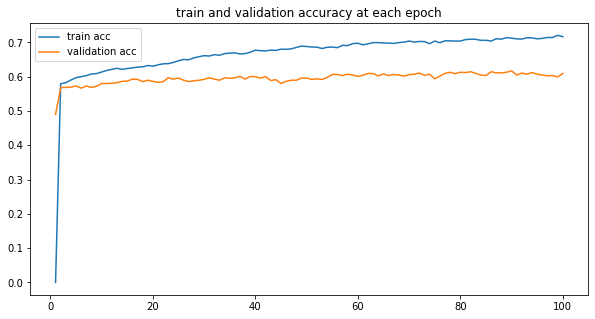

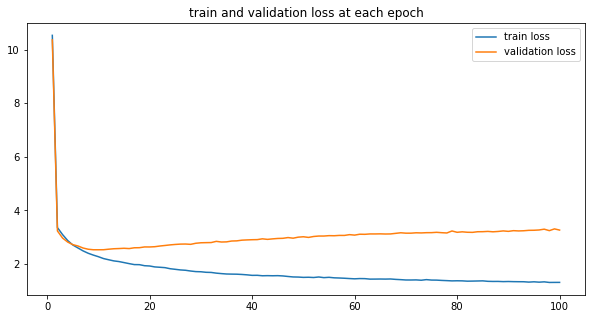

In [160]:
tmp1=[]
for _ in [i*312 for i in range(100)]:
    tmp1.append(train_accs[_])

tmp2=[]
for _ in [i*312 for i in range(100)]:
    tmp2.append(val_accs[_])
    
batches = range(1,len(tmp1)+1)

plt.figure(figsize=(10,5))
plt.plot(batches,tmp1,label='train acc')
plt.plot(batches,tmp2,label='validation acc')
plt.title('train and validation accuracy at each epoch')
plt.legend()


tmp1=[]
for _ in [i*312 for i in range(100)]:
    tmp1.append(train_losses[_])

tmp2=[]
for _ in [i*312 for i in range(100)]:
    tmp2.append(val_losses[_])
    
batches = range(1,len(tmp1)+1)

plt.figure(figsize=(10,5))
plt.plot(batches,tmp1,label='train loss')
plt.plot(batches,tmp2,label='validation loss')
plt.title('train and validation loss at each epoch')
plt.legend()

## Test Model

In [196]:
#Test on train data
decoder_input_data_pred = np.zeros((len(lines.summ), summ_max_length),dtype='float32')


for i in range(40000,40010):
    final_pred_att = []
    print(i)
    word = 21
    for j in range(summ_max_length):
        decoder_input_data_pred[i, j] = word
        pred = model.att.predict([encoder_input_data[i].reshape(1,body_max_length),decoder_input_data_pred[i].reshape(1,summ_max_length)])
        t = np.argmax(pred[0][j])
        word = t
        if word==5:
            break
    final_pred_att.append(list(decoder_input_data_pred[i]))
    
    
    #실제 본문
    b = []
    for j in range(len(encoder_input_data[i])):
        if int(encoder_input_data[i][j])!=0:
            b.append(list(input_token_index.keys())[int(encoder_input_data[i][j]-1)])
    print(b)
    print()

    #키워드 예측
    print(final_pred_att[0])
    tmp=[]
    for _ in range(len(final_pred_att[0])):
        if int(final_pred_att[0][_])!=0:
            tmp.append(list(target_token_index.keys())[int(final_pred_att[0][_]-1)])
    print(tmp)
    print()
    print()

40000
['외교부', 'unk', 'unk', '미국', '미네소타주', '경찰', '현지', '시위', '현장', 'unk', '모습', '연합뉴스', '미국', '미네소타주', '경찰', '과잉', '진압', '흑', '남성', '사건', '시작', '항의', '시위', '미', '전역', '가운데', 'unk', '한국', 'unk', '피해', '입', '확인', '외교부', '당국자', '이날', '미', '전역', '시위', '전국적', '확산', '현재', '미네소타주', '일부', 'unk', '발생', '파악', '구체적', '내용', '확인', '현지', '사건', '발생', '뒤', '인종차별', '반대', '시위', '미네소타주', '미니애폴리스', '인근', '지역', '상점', '약탈', 'unk', '화재', '발생', '외교부', 'unk', '포함', '미국', '지역', '총영사관', '웹사이트', 'unk', 'sns', 'unk', 'unk', '접근', '자제', '신변', '유의', '권고', '현지시각', '미국', '뉴욕', '흑', '남성', '조', '플로이드', '백', '경찰', '가혹', '행위', '사건', '항의', '시위', '가운데', '시위', '참가자', '경찰', '체포', '연합뉴스', '외교부', '인종차별', '시위', '격화', '관련', 'unk', '시위', '미니애폴리스', 'unk', '포함', '뉴욕', 'unk', '지역', '격화', 'unk', '주지사', '미니애폴리스', 'unk', 'unk', 'unk', '상태', '지역', '체류', '방문', '국민들', '유의', '시위', '지역', '접근', 'unk', '당부', '외교부', '당국자', '지역', 'unk', '비상', 'unk', '유', '국민', '상황', '파악', '예방', '한편', 'unk', '필요', 'unk', 'unk', '제공', '예정']

[21.0, 1418.0, 24.0, 2

In [41]:
#Test on Youtube data
kbs = pd.read_csv('kbs_nouns.csv')

In [42]:
import ast
kmorphs = kbs.body_nouns.copy()
kmorphs = kmorphs.apply(ast.literal_eval)

In [61]:
for i in range(20):
    #preprocess according to dictionary
    tmp = kmorphs[i].copy()
    tmp = ' '.join(tmp)
    tmp = filterit_body(tmp)
    
    test_en_inp = np.zeros((1, body_max_length),dtype='float32')
    
    #pad
    for t, word in enumerate(tmp.split()):
        if t==300:
            break
        test_en_inp[0, t] = input_token_index[word]

        
    #Predict
    decoder_input_data_pred = np.zeros((len(kmorphs), summ_max_length),dtype='float32')
    
    final_pred_att = []
    print(i)
    word = 21
    for j in range(summ_max_length):
        decoder_input_data_pred[i, j] = word
        pred =attention.predict([test_en_inp[0].reshape(1,body_max_length),decoder_input_data_pred[i].reshape(1,summ_max_length)])
        t = np.argmax(pred[0][j])
        word = t
        if word==5:
            break
    final_pred_att.append(list(decoder_input_data_pred[i]))
    
    
    #실제 본문
    b = []
    for j in range(len(test_en_inp[0])):
        if int(test_en_inp[0][j])!=0:
            b.append(list(input_token_index.keys())[int(test_en_inp[0][j]-1)])
    print(b)
    print()

    #키워드 예측
    print(final_pred_att[0])
    tmp=[]
    for _ in range(len(final_pred_att[0])):
        if int(final_pred_att[0][_])!=0:
            tmp.append(list(target_token_index.keys())[int(final_pred_att[0][_]-1)])
    print(tmp)
    print()
    print()

0
['전세', '물건', '목소리', '임대차', '시행', '이후', '전세', '월세', '전환', '우려', '정부', '월세', '기자', '설명', '리포트', '부동산', '관계', '아파트', '세대', '전세', '매물', '물량', '눈', '표시', '서울', '아파트', '전세', '물건', '시장', '통계', '전세', '아파트', '수요', '공급', '수급', '지수', '달', '기준', '서울', '전국', '공급', '수요', '뜻', '이후', '공급', '부족', '가격', '밖', '임대차', '시행', '전세', '월세', '거란', '전망', '세입자', '불안감', '정부', '월세', '손', '거', '원', '전세', '보증금', '원', '월세', '약', '원', '월세', '줄', '집주인', '월세', '감소', '전세', '월세', '전환', '가능성', '이걸', '세입자', '주택', '구제', '조정', '소송', '전문가들', '조치', '전세', '월세', '전환', '속도', '월세', '전환', '추세', '자체', '거란', '전망', '은행', '예금', '비교', '수익률', '중요', '월세', '기존', '전세', '월세', '적용', '거', '월세', '월세', '재계약', '월세', '계약', '적용', '월세', '전세', '한국감정원', '발표', '토대', '당사자', '협의', '뉴스', 'unk']

[21.0, 3485.0, 540.0, 1015.0, 14.0, 621.0, 1979.0, 24.0, 2154.0, 3817.0, 3589.0, 2487.0, 992.0, 1611.0, 1531.0, 24.0, 24.0, 24.0, 333.0, 2568.0, 3549.0, 1678.0, 2278.0, 2010.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0